In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import pandas as pd
import datetime

from scipy.stats import ttest_ind

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/jwill96/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
ds = pd.read_csv('indiamon.data.txt', header=None, delim_whitespace=True, index_col = 0, na_values = -999.0)
ds

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,318,58,37,22,17,1395,3210,2603,1721,280,840,5
1949,10,18,5,16,295,1094,3198,1696,3067,595,20,0
1950,17,50,85,15,85,584,3985,1506,2418,196,4,83
1951,34,12,108,68,93,1218,2536,1880,746,627,120,0
1952,4,78,17,48,86,1691,3401,1958,572,242,0,35
1953,150,6,0,106,12,1408,2822,3087,1290,402,0,1
1954,55,85,88,34,32,1293,3657,2073,3552,208,2,30
1955,145,13,22,56,83,1873,1716,4057,2493,1268,25,0
1956,60,6,41,30,540,1510,4321,2518,1601,1128,357,56


In [3]:
ds.columns = ['Jan','Feb','March','April','May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ds = ds.rename_axis('Year')
#ds

<Axes: xlabel='Year'>

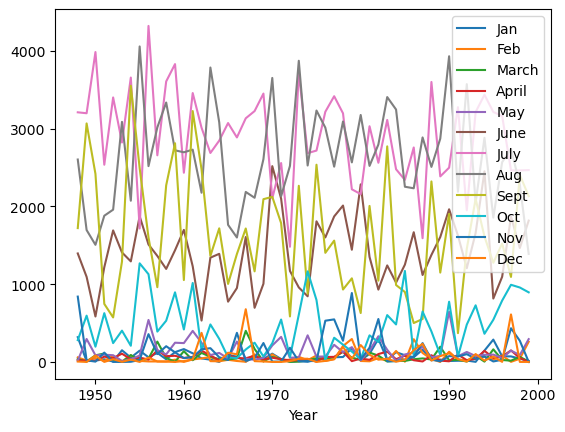

In [4]:
ds.plot()

In [5]:
year_mean = ds.mean(axis=1)
#year_mean

<Axes: xlabel='Year'>

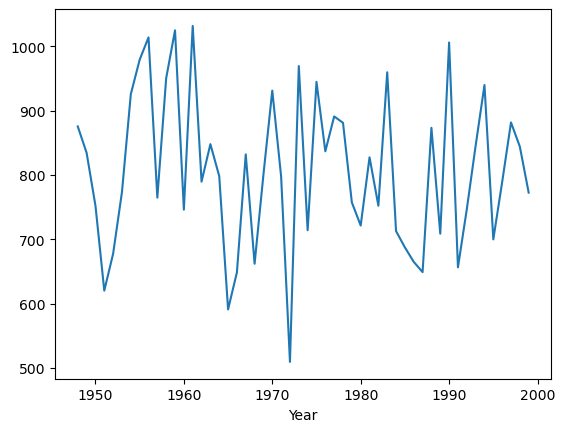

In [6]:
year_mean.plot()

In [7]:
avg_per_month = np. mean(ds, axis=0)
avg_per_month

Jan        73.807692
Feb        56.134615
March      61.134615
April      57.192308
May       150.211538
June     1411.807692
July     2896.576923
Aug      2647.288462
Sept     1626.307692
Oct       470.865385
Nov       148.519231
Dec        72.557692
dtype: float64

<Axes: >

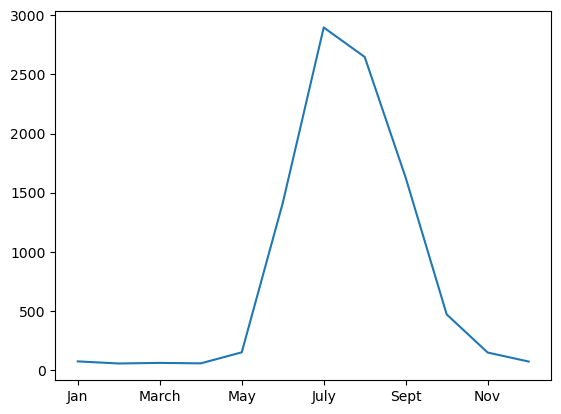

In [8]:
avg_per_month.plot()

In [9]:
da_year = xr.DataArray.from_series(year_mean)
da_year

<xarray.DataArray (Year: 52)> Size: 416B
array([ 875.5       ,  834.5       ,  752.33333333,  620.16666667,
        677.66666667,  773.66666667,  925.75      ,  979.25      ,
       1014.        ,  764.83333333,  950.58333333, 1025.        ,
        746.08333333, 1031.83333333,  789.66666667,  848.        ,
        798.25      ,  591.        ,  648.58333333,  832.08333333,
        662.        ,  800.58333333,  931.25      ,  797.83333333,
        509.33333333,  969.41666667,  714.16666667,  944.83333333,
        836.83333333,  891.08333333,  881.16666667,  757.41666667,
        721.41666667,  827.5       ,  752.25      ,  959.75      ,
        712.75      ,  687.41666667,  664.91666667,  649.        ,
        873.41666667,  708.75      , 1006.08333333,  656.41666667,
        746.66666667,  845.5       ,  939.91666667,  699.91666667,
        788.91666667,  881.75      ,  844.16666667,  772.58333333])
Coordinates:
  * Year     (Year) int64 416B 1948 1949 1950 1951 1952 ... 1996 1997 1998 1999

In [10]:
mean_value = da_year.mean()
mean_value

<xarray.DataArray ()> Size: 8B
np.float64(806.0336538461538)

In [11]:
anomaly = da_year - mean_value
anomaly

<xarray.DataArray (Year: 52)> Size: 416B
array([  69.46634615,   28.46634615,  -53.70032051, -185.86698718,
       -128.36698718,  -32.36698718,  119.71634615,  173.21634615,
        207.96634615,  -41.20032051,  144.54967949,  218.96634615,
        -59.95032051,  225.79967949,  -16.36698718,   41.96634615,
         -7.78365385, -215.03365385, -157.45032051,   26.04967949,
       -144.03365385,   -5.45032051,  125.21634615,   -8.20032051,
       -296.70032051,  163.38301282,  -91.86698718,  138.79967949,
         30.79967949,   85.04967949,   75.13301282,  -48.61698718,
        -84.61698718,   21.46634615,  -53.78365385,  153.71634615,
        -93.28365385, -118.61698718, -141.11698718, -157.03365385,
         67.38301282,  -97.28365385,  200.04967949, -149.61698718,
        -59.36698718,   39.46634615,  133.88301282, -106.11698718,
        -17.11698718,   75.71634615,   38.13301282,  -33.45032051])
Coordinates:
  * Year     (Year) int64 416B 1948 1949 1950 1951 1952 ... 1996 1997 1998 1999

In [62]:
positive=anomaly.where(anomaly>25)
negative=anomaly.where(anomaly<-25)
neutral=anomaly.where((anomaly>-25) & (anomaly<25))
neutral

<xarray.DataArray (Year: 52)> Size: 416B
array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan, -16.36698718,          nan,
        -7.78365385,          nan,          nan,          nan,
                nan,  -5.45032051,          nan,  -8.20032051,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,  21.46634615,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
       -17.11698718,          nan,          nan,          nan])
Coordinates:
  * Year     (Year) int64 416B 1948 1949 1950 1951 1952 ... 1996 1997 1998 1999

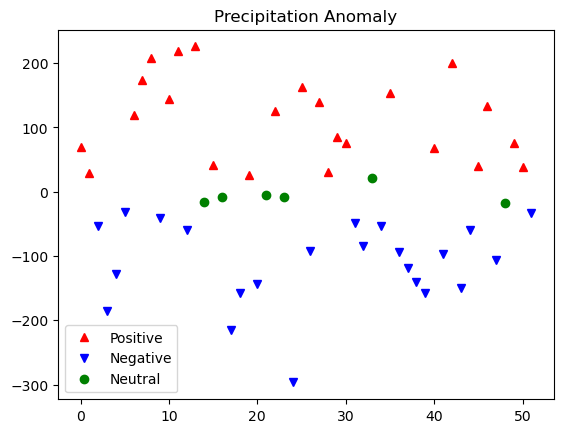

In [63]:
#Plot the difference between the yearly and average monthly precipitation
plt.plot(positive, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(negative,'bv', label = 'Negative')
plt.plot(neutral,'go', label = 'Neutral')
plt.title('Precipitation Anomaly')
plt.legend()

Positive:  23
Neutral:  6
Negative:  23
[array(23), array(23), array(6)]


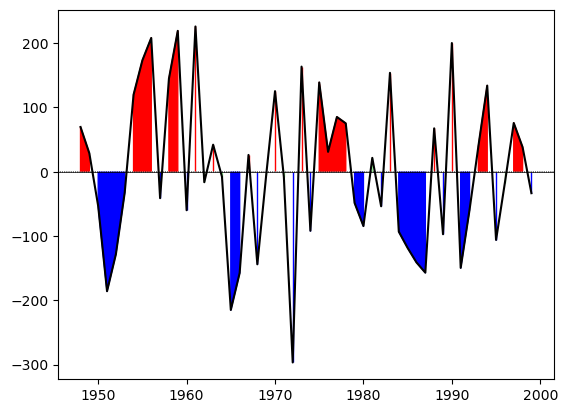

In [64]:
print('Positive: ',positive.count(dim='Year').values)
print('Neutral: ',neutral.count(dim='Year').values)
print('Negative: ',negative.count(dim='Year').values)

counts=[positive.count(dim='Year').values,
        negative.count(dim='Year').values,
        neutral.count(dim='Year').values]
print(counts)

plt.plot(anomaly['Year'],anomaly,'k')
plt.fill_between(anomaly['Year'].values,neutral,color='lightgreen')
plt.fill_between(anomaly['Year'].values,positive,y2=1.0,color='red')
plt.fill_between(anomaly['Year'].values,negative,y2=-1.0,color='blue')

plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;


In [65]:
file='/home/lortizur/clim680/GPCP_precip.mon.mean.nc'
ds_precip = xr.open_dataset(file)
ds_precip

<xarray.Dataset> Size: 21MB
Dimensions:    (lat: 72, lon: 144, time: 496, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 8kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 21MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [66]:
ds_precip_yearly = ds_precip.groupby('time.year').mean()
ds_precip_yearly


<xarray.Dataset> Size: 2MB
Dimensions:   (year: 42, lat: 72, nv: 2, lon: 144)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * year      (year) int64 336B 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (year, lat, nv) float32 24kB -90.0 -87.5 -87.5 ... 87.5 87.5 90.0
    lon_bnds  (year, lon, nv) float32 48kB 0.0 2.5 2.5 5.0 ... 357.5 357.5 360.0
    precip    (year, lat, lon) float32 2MB 0.3585 0.3513 ... 0.3723 0.3682
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [67]:
# I could plot when there is a positive precipitation anomaly during el nino, la nina, neutral years

In [68]:
da_precip_yearly = ds_precip_yearly.precip.sel(year=slice(anomaly['Year'][0],anomaly['Year'][-1]))
da_precip_yearly

<xarray.DataArray 'precip' (year: 21, lat: 72, lon: 144)> Size: 871kB
array([[[0.35845295, 0.35128057, 0.34344685, ..., 0.37124872,
         0.39035192, 0.3975104 ],
        [0.24792945, 0.25606152, 0.25061873, ..., 0.25114688,
         0.26762462, 0.25570884],
        [0.1731527 , 0.18020527, 0.1604781 , ..., 0.20698868,
         0.22599022, 0.2025509 ],
        ...,
        [0.58069867, 0.5729624 , 0.5606948 , ..., 0.5769461 ,
         0.5596661 , 0.5610408 ],
        [0.52964216, 0.5379023 , 0.5301941 , ..., 0.52131695,
         0.5326662 , 0.53042567],
        [0.5417259 , 0.54153246, 0.52485394, ..., 0.52081776,
         0.5287618 , 0.5311776 ]],

       [[0.39021787, 0.38213107, 0.3746123 , ..., 0.40183246,
         0.42229626, 0.42870057],
        [0.23492877, 0.24565655, 0.23750383, ..., 0.24184585,
         0.2579724 , 0.24548484],
        [0.15492275, 0.16451623, 0.14948933, ..., 0.1799324 ,
         0.19846123, 0.1799863 ],
...
        [0.40862158, 0.41477656, 0.4162992 , ..., 0.41542554,
         0.4150393 , 0.3896933 ],
        [0.36609566, 0.37631872, 0.3759462 , ..., 0.38040283,
         0.35042086, 0.39857885],
        [0.37438765, 0.38732967, 0.35879302, ..., 0.4489088 ,
         0.3843085 , 0.32935348]],

       [[0.3590516 , 0.37594017, 0.32387605, ..., 0.29187492,
         0.48751315, 0.3833017 ],
        [0.28789145, 0.29125255, 0.24921702, ..., 0.27828637,
         0.31885102, 0.32783014],
        [0.22146486, 0.21494138, 0.15150641, ..., 0.26344362,
         0.2519579 , 0.23934989],
        ...,
        [0.51172453, 0.514747  , 0.5096215 , ..., 0.60640454,
         0.57609004, 0.52774566],
        [0.51042026, 0.5096367 , 0.47985813, ..., 0.5184622 ,
         0.5094459 , 0.45539916],
        [0.42089748, 0.5420981 , 0.51395535, ..., 0.51266444,
         0.57690996, 0.4889023 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * year     (year) int64 168B 1979 1980 1981 1982 1983 ... 1996 1997 1998 1999
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.     47.3274]

In [69]:
da_climo = da_precip_yearly.mean()
da_anoms = da_precip_yearly - da_climo
da_anoms

<xarray.DataArray 'precip' (year: 21, lat: 72, lon: 144)> Size: 871kB
array([[[-1.8749062, -1.8820785, -1.8899122, ..., -1.8621104,
         -1.8430072, -1.8358487],
        [-1.9854296, -1.9772975, -1.9827404, ..., -1.9822122,
         -1.9657345, -1.9776503],
        [-2.0602064, -2.0531538, -2.072881 , ..., -2.0263705,
         -2.0073688, -2.0308082],
        ...,
        [-1.6526604, -1.6603967, -1.6726643, ..., -1.6564131,
         -1.673693 , -1.6723182],
        [-1.703717 , -1.6954567, -1.703165 , ..., -1.7120421,
         -1.7006929, -1.7029334],
        [-1.6916332, -1.6918266, -1.7085052, ..., -1.7125413,
         -1.7045972, -1.7021816]],

       [[-1.8431412, -1.851228 , -1.8587468, ..., -1.8315266,
         -1.8110628, -1.8046585],
        [-1.9984304, -1.9877026, -1.9958553, ..., -1.9915133,
         -1.9753867, -1.9878743],
        [-2.0784364, -2.068843 , -2.0838697, ..., -2.0534267,
         -2.0348978, -2.0533729],
...
        [-1.8247375, -1.8185825, -1.8170599, ..., -1.8179336,
         -1.8183198, -1.8436658],
        [-1.8672634, -1.8570404, -1.8574129, ..., -1.8529563,
         -1.8829383, -1.8347802],
        [-1.8589715, -1.8460294, -1.8745661, ..., -1.7844503,
         -1.8490506, -1.9040056]],

       [[-1.8743075, -1.8574189, -1.9094831, ..., -1.9414842,
         -1.7458459, -1.8500574],
        [-1.9454677, -1.9421065, -1.9841421, ..., -1.9550728,
         -1.9145081, -1.905529 ],
        [-2.0118942, -2.0184178, -2.0818527, ..., -1.9699155,
         -1.9814012, -1.9940093],
        ...,
        [-1.7216346, -1.7186121, -1.7237376, ..., -1.6269546,
         -1.657269 , -1.7056134],
        [-1.7229388, -1.7237225, -1.7535009, ..., -1.7148969,
         -1.7239132, -1.77796  ],
        [-1.8124616, -1.691261 , -1.7194037, ..., -1.7206947,
         -1.6564491, -1.7444568]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * year     (year) int64 168B 1979 1980 1981 1982 1983 ... 1996 1997 1998 1999

In [70]:
positive_precip = positive.sel(Year=slice(positive['Year'][31],positive['Year'][51]))
negative_precip = negative.sel(Year=slice(negative['Year'][31],negative['Year'][51]))
neutral_precip = neutral.sel(Year=slice(neutral['Year'][31],neutral['Year'][51]))
negative_precip

<xarray.DataArray (Year: 21)> Size: 168B
array([ -48.61698718,  -84.61698718,           nan,  -53.78365385,
                 nan,  -93.28365385, -118.61698718, -141.11698718,
       -157.03365385,           nan,  -97.28365385,           nan,
       -149.61698718,  -59.36698718,           nan,           nan,
       -106.11698718,           nan,           nan,           nan,
        -33.45032051])
Coordinates:
  * Year     (Year) int64 168B 1979 1980 1981 1982 1983 ... 1996 1997 1998 1999

In [71]:
#positive_precip

In [72]:
pos_precip = da_anoms.sel(year=positive_precip.dropna(dim='Year')['Year']).mean(dim='Year')
neg_precip = da_anoms.sel(year=negative_precip.dropna(dim='Year')['Year']).mean(dim='Year')
neut_precip = da_anoms.sel(year=neutral_precip.dropna(dim='Year')['Year']).mean(dim='Year')
positive_precip

<xarray.DataArray (Year: 21)> Size: 168B
array([         nan,          nan,          nan,          nan,
       153.71634615,          nan,          nan,          nan,
                nan,  67.38301282,          nan, 200.04967949,
                nan,          nan,  39.46634615, 133.88301282,
                nan,          nan,  75.71634615,  38.13301282,
                nan])
Coordinates:
  * Year     (Year) int64 168B 1979 1980 1981 1982 1983 ... 1996 1997 1998 1999

In [73]:
neut_precip

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[-1.8641322, -1.888084 , -1.8833733, ..., -1.8604789, -1.845082 ,
        -1.8543354],
       [-1.9743106, -1.9736197, -1.9937608, ..., -1.9927945, -1.9760971,
        -1.9783211],
       [-2.0330215, -2.0457206, -2.083963 , ..., -2.0410624, -2.0074167,
        -2.0337937],
       ...,
       [-1.6964021, -1.6800413, -1.6684998, ..., -1.7331598, -1.7305471,
        -1.7165825],
       [-1.7781022, -1.7780521, -1.7742646, ..., -1.8038292, -1.780791 ,
        -1.7787274],
       [-1.7885709, -1.7788789, -1.7884182, ..., -1.7738891, -1.8124133,
        -1.7711077]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [74]:
comp_precip = [pos_precip,neg_precip,neut_precip]
comp_precip

[<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-1.9422878, -1.9558935, -1.9726335, ..., -1.924903 , -1.9191445,
         -1.9173938],
        [-2.0374568, -2.028217 , -2.0404222, ..., -2.0330317, -2.0364316,
         -2.0320587],
        [-2.0725646, -2.0737855, -2.09882  , ..., -2.0543997, -2.0499034,
         -2.05413  ],
        ...,
        [-1.7749853, -1.7744261, -1.7643769, ..., -1.7721568, -1.771815 ,
         -1.7785963],
        [-1.8223747, -1.7997769, -1.7989998, ..., -1.8094054, -1.8006442,
         -1.794945 ],
        [-1.7727978, -1.772412 , -1.8111118, ..., -1.8036412, -1.8117923,
         -1.8071346]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8,
 <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-1.8821875, -1.8882146, -1.8909818, ..., -1.8920723, -1.8533301,
         -1.8585154],
       

In [75]:
('positive', 'negative', 'neutral')

precip_dict = {'positive': pos_precip,
               'negative': neg_precip,
               'neutral': neut_precip}

In [76]:
precip_dict

{'positive': <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-1.9422878, -1.9558935, -1.9726335, ..., -1.924903 , -1.9191445,
         -1.9173938],
        [-2.0374568, -2.028217 , -2.0404222, ..., -2.0330317, -2.0364316,
         -2.0320587],
        [-2.0725646, -2.0737855, -2.09882  , ..., -2.0543997, -2.0499034,
         -2.05413  ],
        ...,
        [-1.7749853, -1.7744261, -1.7643769, ..., -1.7721568, -1.771815 ,
         -1.7785963],
        [-1.8223747, -1.7997769, -1.7989998, ..., -1.8094054, -1.8006442,
         -1.794945 ],
        [-1.7727978, -1.772412 , -1.8111118, ..., -1.8036412, -1.8117923,
         -1.8071346]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8,
 'negative': <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-1.8821875, -1.8882146, -1.8909818, ..., -1.8920723, -1.8533301,
     

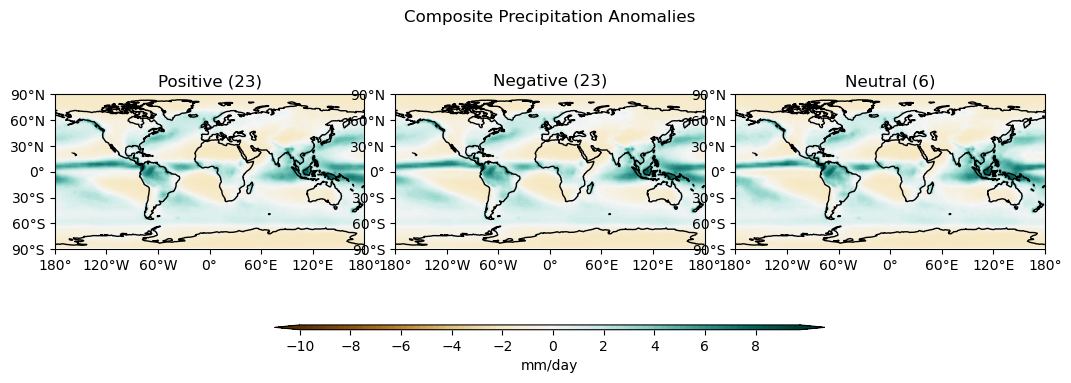

In [77]:
labels=['Positive','Negative', 'Neutral']
clevs = np.arange(-10.0,10.0,.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,4))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,prec in enumerate(comp_precip):

        # Select the season
        data = comp_precip[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies') ;

In [81]:
diff_precip=[pos_precip-neut_precip,
            neg_precip-neut_precip]
diff_precip

[<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-0.07815564, -0.06780946, -0.08926022, ..., -0.06442416,
         -0.07406247, -0.06305838],
        [-0.06314611, -0.05459738, -0.04666138, ..., -0.04023719,
         -0.06033444, -0.05373764],
        [-0.03954315, -0.02806497, -0.01485705, ..., -0.01333737,
         -0.04248667, -0.02033639],
        ...,
        [-0.07858324, -0.09438479, -0.09587705, ..., -0.03899705,
         -0.04126787, -0.06201375],
        [-0.04427254, -0.02172482, -0.02473521, ..., -0.00557625,
         -0.01985312, -0.01621759],
        [ 0.01577306,  0.00646698, -0.02269363, ..., -0.02975214,
          0.00062108, -0.03602695]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8,
 <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[-1.80553198e-02, -1.30534172e-04, -7.60853291e-03, ...,
  

Text(0.5, 0.98, 'Composite Precipitation Differences')

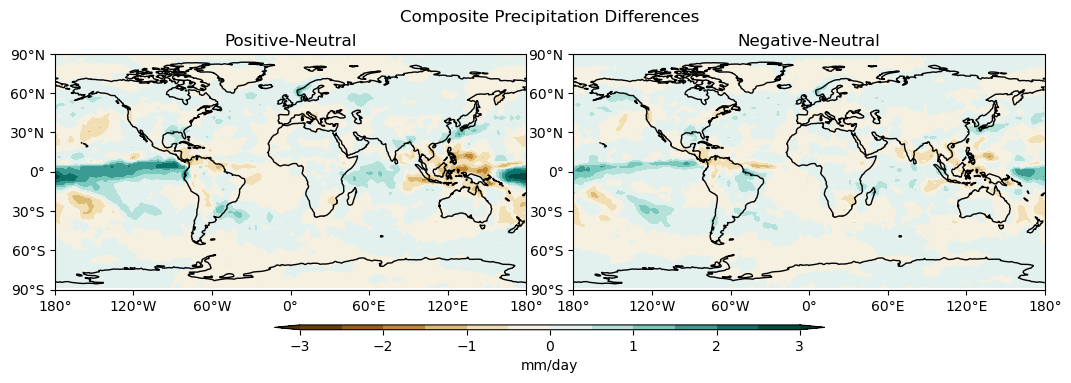

In [82]:
labels=['Positive-Neutral', 'Negative-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,4))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_precip):

        # Select the season
        data = diff_precip[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_precip[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences')

In [83]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance

In [92]:
from scipy.stats import ttest_ind

pos_precip_vals = da_anoms.sel(year=positive_precip.dropna(dim='Year')['Year'])
neg_precip_vals = da_anoms.sel(year=negative_precip.dropna(dim='Year')['Year'])
neut_precip_vals = da_anoms.sel(year=neutral_precip.dropna(dim='Year')['Year'])



In [93]:
tstat,pval = ttest_ind(pos_precip_vals, 
                neut_precip_vals, 
                equal_var = False)

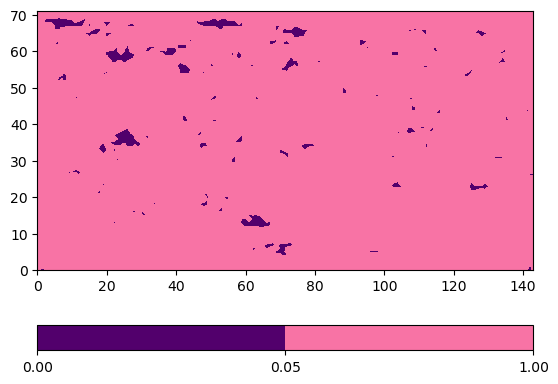

In [95]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [96]:
mask_diff = diff_precip[0].where(pval <= p)
mask_diff

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[-0.07815564, -0.06780946, -0.08926022, ..., -0.06442416,
        -0.07406247,         nan],
       [        nan,         nan,         nan, ...,         nan,
        -0.06033444,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

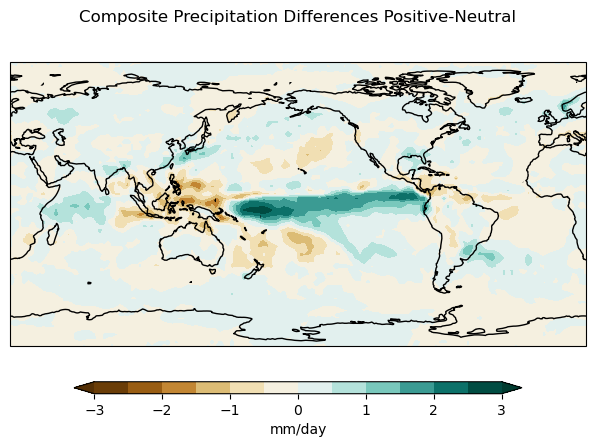

In [98]:
labels=['Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_precip[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),
                colors=['None'],
                hatches=['.',''],
                extend='both',
                alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences Positive-Neutral')

plt.savefig('stats_ttest.png')

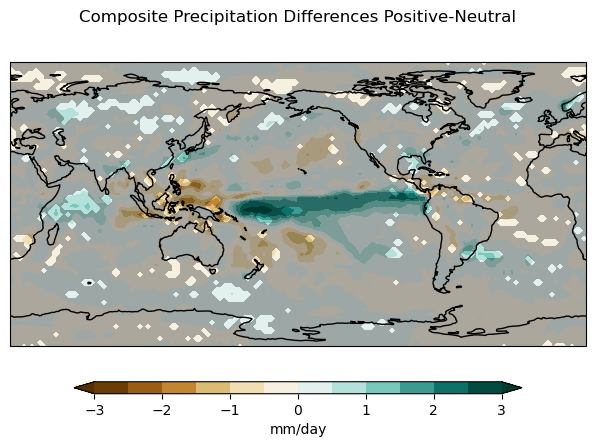

In [101]:
mask_diff_o = xr.ones_like(diff_precip[0]).where(pval > p) # This retains data where the pval is insignificant


labels=['Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})

data=diff_precip[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data_o,lons=add_cyclic_point(mask_diff_o,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Mask out insignficant areas with semi-transparent shading
ss=axs.contourf(lons,diff_precip[0]['lat'],mask_data_o,
                transform = ccrs.PlateCarree(),colors=['k'],
                alpha=0.3)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences Positive-Neutral')

plt.savefig('stats_ttest.png',dpi=200)

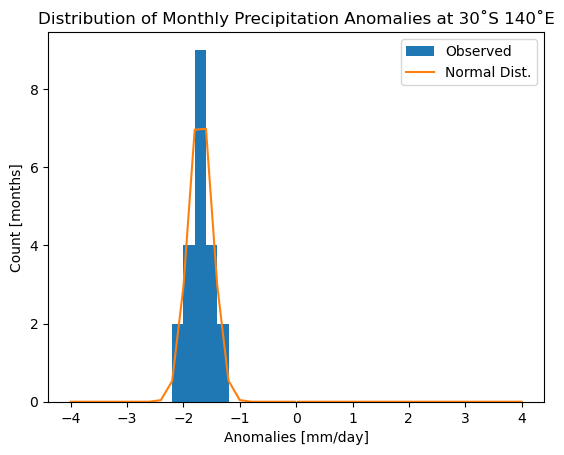

In [102]:
from scipy.stats import norm

#lat,lon = 39,-79
lat,lon = -30,140
grid_anoms = da_anoms.sel(lat=lat,lon=lon,method='nearest')

spacing = 0.2
xvals = np.arange(-4,4.1,spacing)
p_distrib = plt.hist(grid_anoms,bins=xvals,label="Observed")

plt.plot(xvals,spacing*grid_anoms.count().data*norm.pdf(xvals,grid_anoms.mean(),grid_anoms.std()),label="Normal Dist.")
plt.legend()

plt.ylabel("Count [months]")
plt.xlabel("Anomalies [mm/day]")

plt.axvline(0,color='w',linewidth=0.5)

slon = f"{lon}˚E"
if lon < 0: slon=f"{-lon}˚W"
slat = f"{lat}˚N"
if lat < 0: slat=f"{-lat}˚S"

plt.title(f"Distribution of Monthly Precipitation Anomalies at {slat} {slon}") ;